# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 02 - Getting Data

Read the .csv file.

In [60]:
df = pd.read_csv('marketing_customer_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [61]:
# Change headers names

df.columns = df.columns.str.replace(' ', '_').str.lower()

df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [62]:
# Deal with NaN values

df.isna().sum()


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [63]:
#Categorical Features & Numerical Features

df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [64]:
#exploration

df.describe(include="all")

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,LR79755,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [65]:
df.sort_values("income", axis = 0, ascending=False).head()


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
1750,CJ31839,California,2859.528930,No,Basic,Bachelor,2/18/11,Employed,M,99981,...,22,0,1,Special Auto,Special L2,Offer2,Web,204.872273,Four-Door Car,Small
2306,GL69461,Oregon,2628.468543,No,Basic,College,2/16/11,Employed,F,99961,...,54,2,1,Personal Auto,Personal L1,Offer3,Agent,316.800000,Four-Door Car,Medsize
532,JS42382,Oregon,6172.914199,No,Extended,Master,1/27/11,Employed,M,99960,...,83,0,4,Corporate Auto,Corporate L3,Offer1,Agent,364.800000,Four-Door Car,Small
932,ST43550,Oregon,5727.327124,No,Basic,Bachelor,1/26/11,Employed,M,99934,...,12,0,3,Special Auto,Special L3,Offer4,Web,460.323855,Four-Door Car,Medsize
4811,GA27295,California,39365.296160,No,Basic,Master,1/14/11,Employed,F,99875,...,37,0,2,Personal Auto,Personal L3,Offer3,Call Center,114.972914,SUV,Medsize


In [66]:
df_corr = df.corr()
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

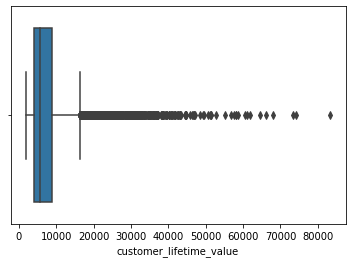

In [67]:
#Dealing with outliers

sns.boxplot(x=df['customer_lifetime_value']) 
plt.show()

In [68]:
# removing outliers
# first we find our interquartile range
iqr = np.percentile(df['customer_lifetime_value'],75) - np.percentile(df['customer_lifetime_value'],25)
iqr

4967.915247000001

In [69]:
# if you don't have your own conception of outlier for the data you are analyzing, 
# the stantard threshold to consider is by adding (upper) or subtracting (lower) 1.5 x IQR
upper_limit = np.percentile(df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(df['customer_lifetime_value'],25) - 1.5*iqr
upper_limit, lower_limit

(16414.039911750002, -3457.6210762500014)

In [70]:
df.loc[(df['customer_lifetime_value']>upper_limit), 'customer_lifetime_value'] =  upper_limit

In [71]:
iqr = np.percentile(df['customer_lifetime_value'],75) - np.percentile(df['customer_lifetime_value'],25)
upper_limit = np.percentile(df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(df['customer_lifetime_value'],25) - 1.5*iqr
upper_limit, lower_limit

(16414.039911750002, -3457.6210762500014)

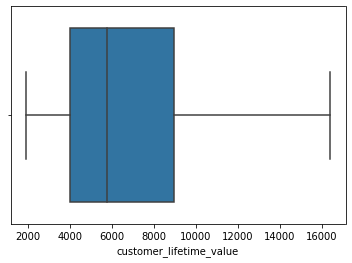

In [72]:
#showing the results
sns.boxplot(x=df['customer_lifetime_value']) # whis is the parameter to choose your threshold, standard is 1.5
plt.show()

In [73]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df        

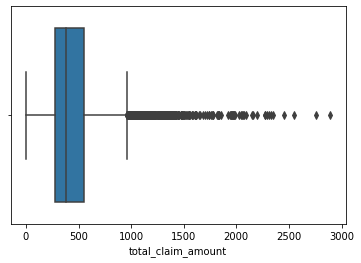

In [74]:
sns.boxplot(x=df['total_claim_amount']) 
plt.show()

#it seems that it didn't work out. But I don't know why.

In [75]:
#Encoding Categorical Data

X_cat = df['gender']

cat_df = pd.get_dummies(X_cat, drop_first=True) # if you need to save the encoding info, this won't do
cat_df[:20]

,M
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,1
9,0


## 05 - Modeling

Apply model.

In [76]:
#boxcox transformation

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [77]:
df, _ci = boxcox_transform(df)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,5.722930,No,Basic,Bachelor,2/24/11,Employed,F,1247.937066,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,6.169158,No,Extended,Bachelor,1/31/11,Unemployed,F,1167.961720,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,6.445326,No,Premium,Bachelor,2/19/11,Employed,F,1144.063081,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,6.211159,No,Basic,Bachelor,1/20/11,Unemployed,M,1167.961720,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,5.731943,No,Basic,Bachelor,2/3/11,Employed,M,1072.375744,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,6.550258,No,Basic,Bachelor,2/10/11,Employed,M,1448.531450,...,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize
9130,PK87824,California,5.779686,Yes,Extended,College,2/12/11,Employed,F,697.790558,...,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize
9131,TD14365,California,6.241150,No,Extended,Bachelor,2/6/11,Unemployed,M,1167.961720,...,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize
9132,UP19263,California,6.203809,No,Extended,College,2/3/11,Employed,M,704.383672,...,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large


## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [79]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'CY49953'

In [ ]:
predictions = model.predict(X_test)

In [78]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

NameError: name 'y_test' is not defined

## 07 - Reporting

Present results.